# <code style="color:Crimson">1. EXPLORATORY DATA ANALYSIS</code>

## This is an example of Supervised Learning using Classification

### Project Scope: Chief People Officer

Our client is at a HR department at a large software company. They are rolling out a new initiative that they call, "Proactive Retention". The idea is to use data, to predict whether an employee is likely to leave. Once these employees are identified HR can be more productive in reaching out to them before it's too late.
For this intitiative, they only care about permanent (non temporary employees)

Currently, their employee retention process is very retrospective. Once an employee leaves he/she takes an exit interview. HR then tries to learn insights from that interview and to make changes around the company accordingly.


Our role:
Build a model to predict the probablity that a current employee would leave. We have been given a dataset with information about employees. Both employeed and left. Our task is to build a classification model using that dataset. 

### Specifics:

**Machine Learning task:** Classification model

**Target variable:** Status (Left/Employeed)

**Input variables:** Refer to data dictionary file - "Data Dictionary - Chief People Officer"

**Success Criteria:** N/A. Best possible model. Since there is no baseline or precedent, we do not have a quantifiable measure.

### This project will be carried out in 4 stages

**1. Exploratory Data Analysis:** Data understanding and generating insights


**2. Data Cleaning & Data Preparation:** Preparing data for Modelling


**3. Data Modelling:** Experimenting with classification algorithms


**4. Model Evaluation:** Verifying using performance metrics

## Importing the libraries


In [1]:
# NumPy for numerical computing
import numpy as np


# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for other options and better visualization
import seaborn as sns

# Suppress FutureWarning - (Optional)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read the dataset

In [2]:
df = pd.read_csv('employee_data.csv')

## Basic Information

**A.** Let's begin by exploring the basics

* Display the shape of the dataset to check;

* How many observations do we have?

* How many features do we have?



In [3]:
df.shape

(14249, 10)

**B.** Display the datatypes of the features

* Which are the numeric features?

* Which are the categorical features?

In [4]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

At this point, we should doublecheck all the datatypes and compare it with the data dictionary that is provided just to verify the data types (i.e. numeric features that should be categorical or vice-versa)

**C.** Display the first 10 observations from the dataset. The purpose is to quickly eyeball the data. 

* Do the columns make sense?

* Do the values in those columns make sense?

* What types of classes are there for the categorical features?

In [5]:
#first 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


## Plot Distributions of Numeric Features
One of the most enlightening data exploration tasks is plotting the distributions of your features. For numerical features we are going to use a pandas histogram.

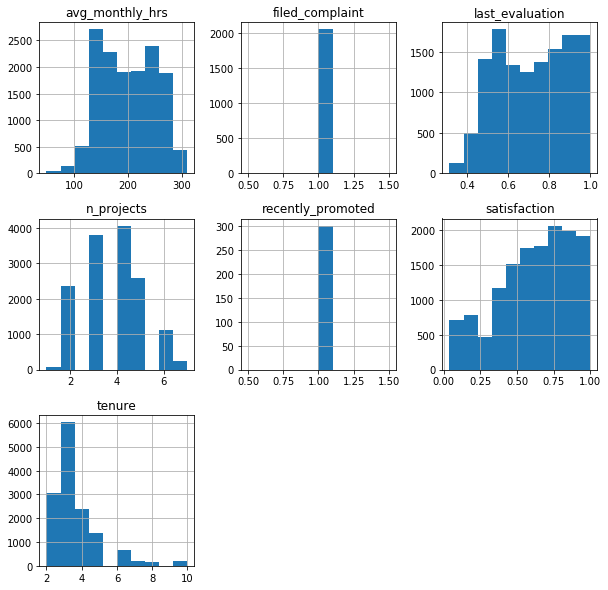

In [6]:
#plotting numerical features
df.hist(figsize=(10,10))
plt.show()

**Consider these questions:**

* Are there any distributions that don't make sense?

* Does it look like there are potential outliers that don't make sense?

* Are there any boundaries that don't make sense?


####  From the above histograms, nothing seems to be out of ordinary. We can move on.

## Display summary statistics of the numeric features.

In [7]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


**Consider these questions:**

* Are any of the count values less than the total number of observations? What does this imply?

* Do the min values for each column make sense?

* Do the max values for each column make sense?

## Plot Distributions of Categorical Features

In [8]:
#display the summary for categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


**Consider these questions:**

For each categorical feature;

* How many unique classes does it have?

* What is the most frequent class?

* How many observations belong to the most frequent class?

* Does it have any missing values?


####  We visualized the numerical fetures using pandas hist. Now let's visualize the categorical features using seaborn countplot.

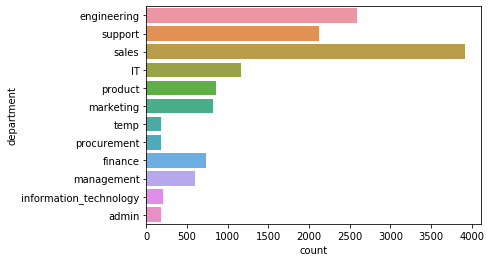

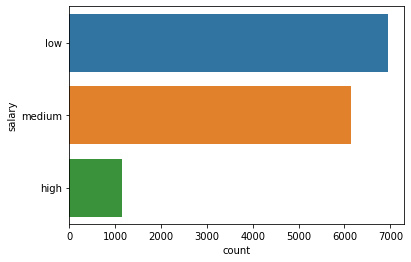

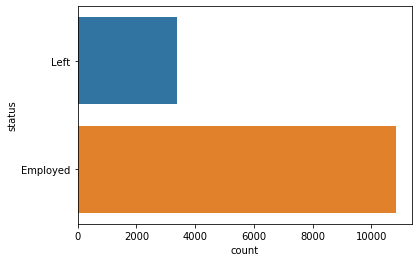

In [9]:
#visualize only the categorical features
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()


**Consider these questions:**

* Are there any sparse classes?

  **No**


* Are there any classes that shouldn't be in the dataset based on our project scope?

  **Yes**, there is this temp class in the department feature. The HR department is only concerned about the         permanant employees. We should drop this class. 


* Are there any mislabeled classes (i.e. two classes that are essentially the same)?

  **Yes**, IT and Information_Technology are the same. We should merge them.


####  Let's make those alterations
Replace all instances of the 'information_technology' class with 'IT'

In [10]:
df.department.replace('information_technology','IT',inplace=True)

let's remove observations with the 'temp' class for department.

In [11]:
df = df[df.department != 'temp']



Let' just do a sanity check and verify the plot again.

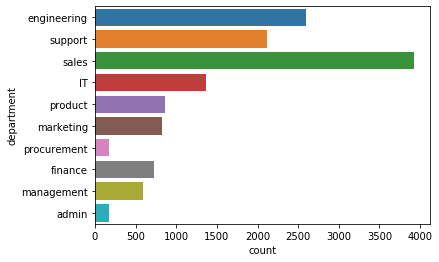

In [12]:
sns.countplot(y='department', data=df)

Finally, Let' determine which department has employees who worked the most monthly hours on average.

In [13]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
procurement,199.482759,1.0,0.699205,3.885057,1.0,0.627930,3.264368
marketing,199.664225,1.0,0.715018,3.687424,1.0,0.629122,3.567766
product,199.991860,1.0,0.719616,3.817442,NaN,0.628774,3.487209
sales,200.842467,1.0,0.711254,3.772878,1.0,0.623075,3.527148
support,200.975495,1.0,0.723200,3.804430,1.0,0.626923,3.394910
management,201.025210,1.0,0.729714,3.857143,1.0,0.630428,4.294118
finance,201.175824,1.0,0.723880,3.815934,1.0,0.586787,3.543956
admin,201.272727,1.0,0.726282,3.897727,1.0,0.611450,3.369318
IT,202.174453,1.0,0.720017,3.810219,1.0,0.628079,3.456204


## Plotting Segmentations

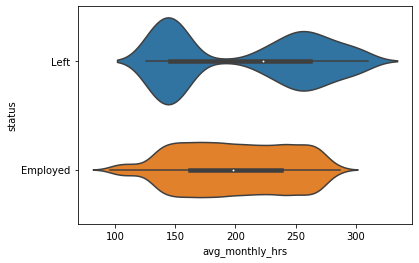

In [14]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

**Some useful insights**

Interestingly, those who left fell into two categories in regards to average monthly hours: those who worked far below average and those who worked above average.


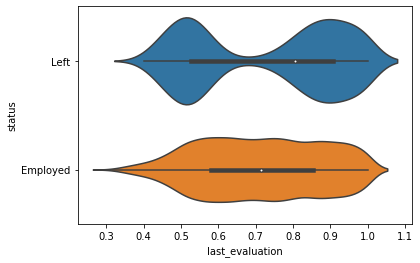

In [15]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

**Some useful insights**

Those who left were either high performers or low performers. Very few average performers left.

Let's use a **groupby** to see detailed statistics by class.

Group by 'status' and calculate the average value of each feature within each class.

In [16]:
# Segment by status and display the means within each class
df.groupby(df.status).mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,199.142230,1.0,0.714479,3.786282,1.0,0.675979,3.380245
Left,207.254232,1.0,0.730706,3.847936,1.0,0.447500,3.869023


We can now compare all of the numeric features between employees who've left and those who are still employed.

**Consider these questions**

* Did leavers work more hours per month?

  **Yes**, on average, leavers worked more hours per month.
  
  
* On average, were leavers longer tenured?

  **Yes**, On average, leavers were longer tenured.
  

* On average, did leavers have lower evaluations than those who are still employed?

  **No**, On average, leavers had higher, not lower, performance evaluations.
  

* What percent of leavers filed a complaint? How about those who are still employed?

  Only 4.6% of leavers filed a complaint compared to 17.5% of those still employed.
  

* What percent of leavers were recently promoted? How about those who are still employed?

  Only 0.5% of leavers were recently promoted compared to 2.6% of those still employed.



#### Let's see if there is any relation between satisfaction and status. Do Unsatisfied employees leave and Satisfied employees stay?

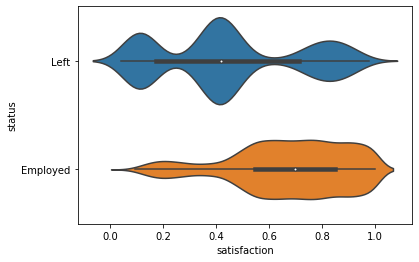

In [17]:
#Segment satisfaction by status
sns.violinplot(x='satisfaction',y='status', data=df)

**Some useful insights**

1. Employees who are still employed are largely satisfied with their jobs, which is good.


2. However, the variation of satisfaction distribution for employees who left the company is interesting! 
This viloin plot shows us that it's not only unsatisfied employees who leave. In fact, there is a notable group of highly satisfied employees who have left as well.

####  So why are highly satisfied employees leaving the company?

In order to analyse the above question, we can use bivariate segmentation to see if there is another feature in play. 


We will use a sns.lmplot() function from the Seaborn library.

sns.lmplot() is essentially a regular scatterplot with additional options.

For example, we can color each point based on its 'status'.To do so, we can use the hue argument.


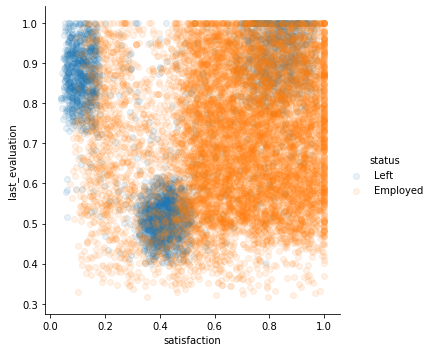

In [18]:
sns.lmplot(x='satisfaction',y='last_evaluation', hue='status', data=df,scatter_kws={'alpha':0.1}, fit_reg=False)

#scatter_kws={'alpha':0.1} is to make the points transparent. 
#We need to do this in order to see both classes wherever they are overlapping.

# fit_reg=False will get rid of the regression line which otherwise is plotted on the plot.

If we just want to see the data for those who have left. change the data argument as below

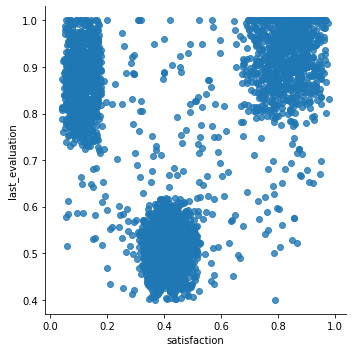

In [19]:
sns.lmplot(x='satisfaction',y='last_evaluation', data=df[df['status']=='Left'],fit_reg=False)

Those three clusters can be divided into three categories:


Unhappy: for satisfaction_level < 0.2... maybe they are overqualified?


Underperformers: for last_evaluation < 0.6


Overachievers: for last_evaluation > 0.8 and satisfaction > 0.7

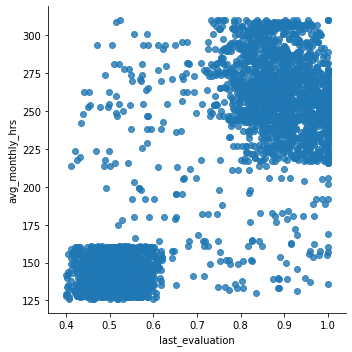

In [20]:
#Plot 'last_evaluation' by 'avg_monthly_hrs' and segment by 'status'
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()

Looks like there are clusters of people who left based on these two features. We can create new features during feature engineering based on this information.


'Stars' with avg_monthly_hrs > 215 and last_evaluation > 0.75


'Slackers' with avg_monthly_hrs < 165 and last_evaluation < 0.65

## Ad-Hoc Data Cleaning

In [21]:
#df.head(20)
df.filed_complaint.unique()
df.recently_promoted.unique()

array([nan,  1.])

We can see that some columns like recently_promoted and filed_complaint are flags. However, their 0 values are blank (NaN) instead of 0.

They can be troublesome while performing Exploratory Data Analysis. For. e.g. see what happens when we plot a correlation matrix for those features

In [22]:
df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,NaN,0.340136,0.418882,NaN,-0.019622,0.124954
filed_complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,0.340136,NaN,1.000000,0.345590,NaN,0.089189,0.132100
n_projects,0.418882,NaN,0.345590,1.000000,NaN,-0.143514,0.192653
recently_promoted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,-0.019622,NaN,0.089189,-0.143514,NaN,1.000000,-0.097301
tenure,0.124954,NaN,0.132100,0.192653,NaN,-0.097301,1.000000



Observe the correlation coefficiants for the columns filed_complaint and recently_promoted. It is not able to calculate correlations with other features because those columns have missing values. 

In [23]:
#simply fill those blanks with 0

df.recently_promoted.fillna(0,inplace=True)

df.filed_complaint.fillna(0,inplace=True)

In [24]:
#the isse shoudl be fixed now.
df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,-0.007238,0.340136,0.418882,-0.001203,-0.019622,0.124954
filed_complaint,-0.007238,1.000000,-0.014694,-0.003293,0.043196,0.056338,0.007224
last_evaluation,0.340136,-0.014694,1.000000,0.345590,-0.008359,0.089189,0.132100
n_projects,0.418882,-0.003293,0.345590,1.000000,-0.004901,-0.143514,0.192653
recently_promoted,-0.001203,0.043196,-0.008359,-0.004901,1.000000,0.025797,0.068991
satisfaction,-0.019622,0.056338,0.089189,-0.143514,0.025797,1.000000,-0.097301
tenure,0.124954,0.007224,0.132100,0.192653,0.068991,-0.097301,1.000000




As it turns out, recent promotions do not appear to correlate with satisfaction level. Therefore, giving more promotions is definately not the solution.


#### Realise how we are not able to correlate the salary feature with other features. That's beacuse the salary feature is a categorical field. Let's convert the field to numerical so that we are able to visualise the correlation.

## Ad-Hoc Feature Engineering

#### Notice that the categorical feature, 'salary', has three classes with clear distinction between them. This is referred to as an Ordinal feature.

In [25]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

Let's fill those classes with numbers. 

low salary as 0, medium salary as 1, and high salary as 2.

In [26]:
df['salary_derived'] = df.salary.replace({'low':0,'medium':1,'high':3})

In [27]:
df.salary_derived.unique()

array([0, 1, 3])

###  Let's plot a correlation heatmap.

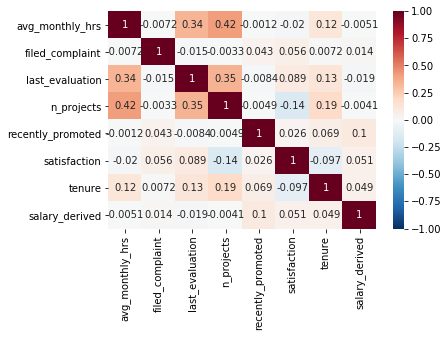

In [28]:
sns.heatmap(data=df.corr(),annot=True,cmap='RdBu_r',vmin=-1,vmax=1)

####  The correlation coefficient always takes a value between -1 and 1, with 1 or -1 indicating perfect correlation (all points would lie along a straight line in this case). ... A correlation value close to 0 indicates no association between the variables.

In [29]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_derived
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0


In [30]:
#Save the file
df.to_csv('employee_data_EDA.csv')